In [152]:
import pandas as pd
import matplotlib.pyplot as plt


city = 'MARIBOR'

train = pd.read_csv(f'../data/train/{city}.csv', parse_dates=True, index_col=0)

train = train.sort_index()

In [153]:
# add column to calculate time difference between two consecutive rows
train['time_diff'] = train.index.to_series().diff().dt.total_seconds().fillna(0)

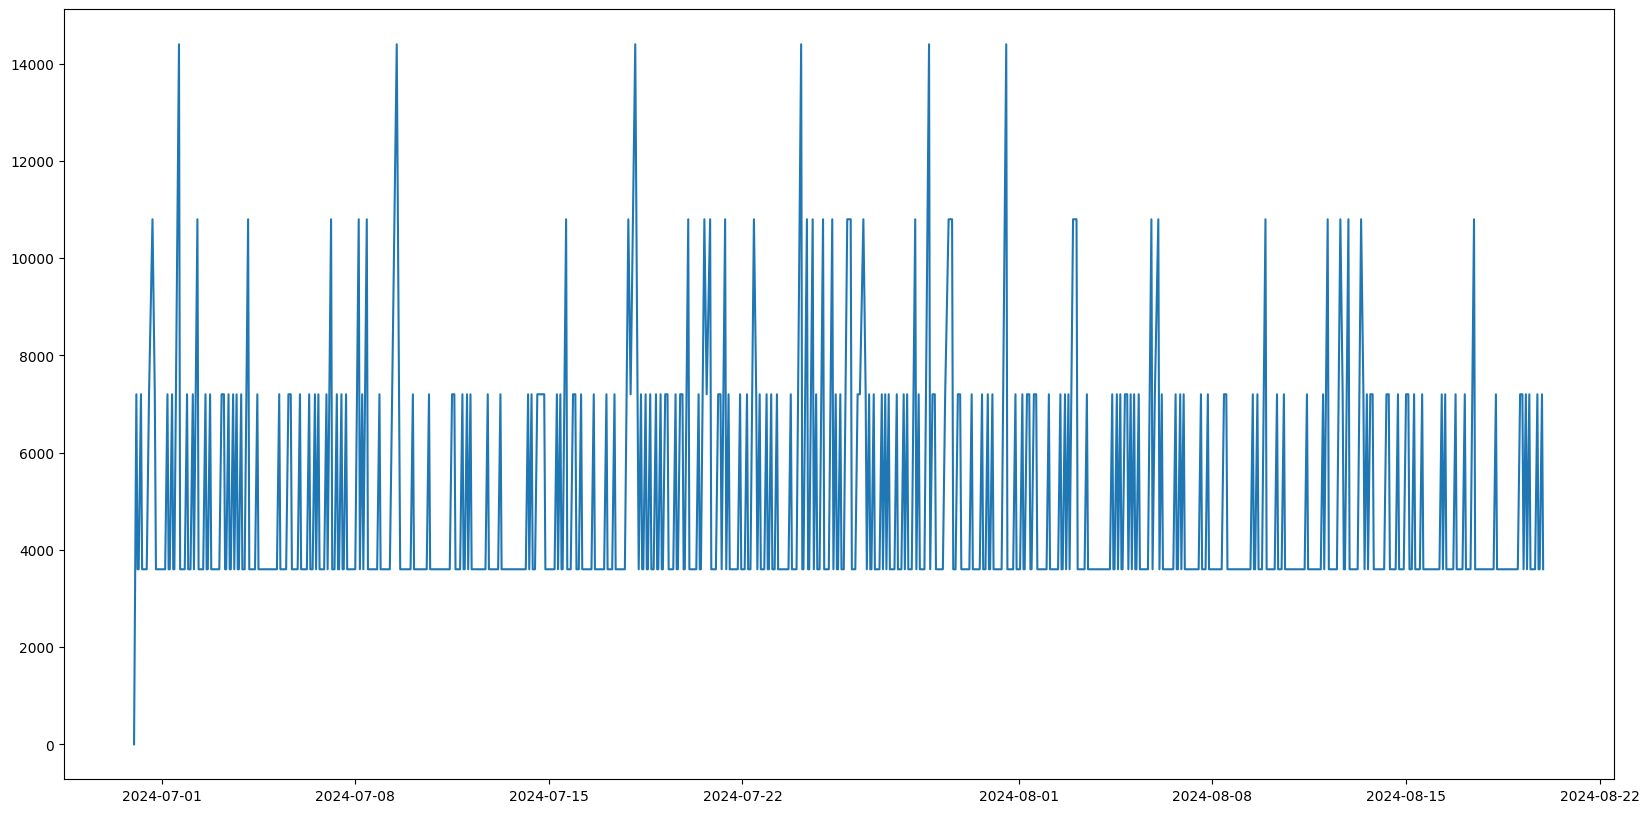

In [154]:
# plot time diffeence based on time using plt, make graph larger
plt.figure(figsize=(20, 10))
plt.plot(train.index, train['time_diff'])
plt.show()

In [155]:
train['time_diff'].describe()

count      979.000000
mean      4497.242084
std       1950.811942
min          0.000000
25%       3600.000000
50%       3600.000000
75%       3600.000000
max      14400.000000
Name: time_diff, dtype: float64

In [156]:
# train_resampled = train.resample('H').mean()
# train_resampled.fillna(method='ffill', inplace=True)

In [157]:
# train_resampled['time_diff'] = train_resampled.index.to_series().diff().dt.total_seconds().fillna(0)

In [158]:
# plt.figure(figsize=(20, 10))
# plt.plot(train_resampled.index, train_resampled['time_diff'])
# plt.show()

In [159]:
# # Print distribution of each column in a grid of histograms with 3 rows
# train_resampled.hist(bins=50, figsize=(20, 15))
# plt.show()


In [160]:
# train_resampled['time_diff'].describe()